In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
df=pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df.shape

(10, 15)

In [4]:
df.duplicated().any()

True

In [5]:
df.drop_duplicates()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
df.shape

(10, 15)

In [7]:
df.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [9]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df=pd.get_dummies(df)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


### Association rules with 20% Support and 40% confidence

In [11]:
freq_1 = apriori(df,min_support=0.2,use_colnames=True)
freq_1['length'] = freq_1['itemsets'].apply(lambda x: len(x))
freq_1

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
76,0.4,"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Se...",5
77,0.4,"(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G...",5
78,0.4,"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Se...",5
79,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, V1_Gladi...",5


In [12]:
result_1 = association_rules(freq_1, metric='confidence', min_threshold=0.4)
result_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
...,...,...,...,...,...,...,...,...,...,...
642,(Sixth Sense),"(Patriot, V2_Patriot, V3_Sixth Sense, V1_Gladi...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
643,(V2_Patriot),"(Patriot, Sixth Sense, V3_Sixth Sense, V1_Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
644,(V3_Sixth Sense),"(Patriot, Sixth Sense, V2_Patriot, V1_Gladiato...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
645,(V1_Gladiator),"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


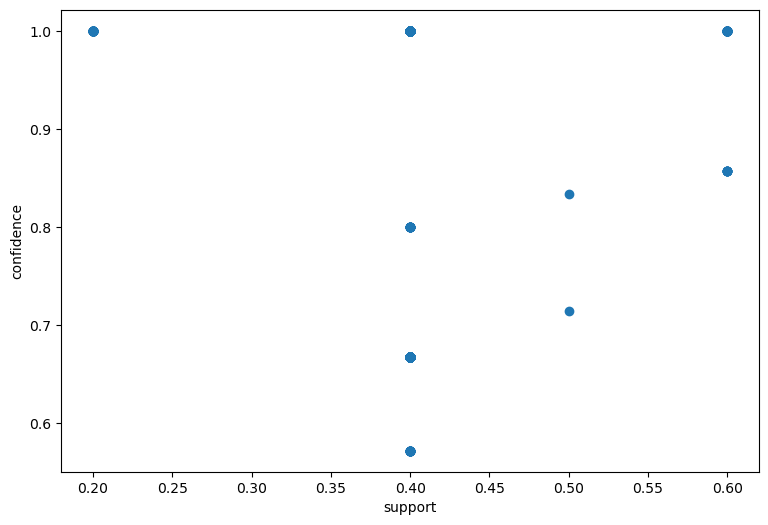

In [13]:
plt.figure(figsize=(9,6))
plt.scatter(result_1['support'],result_1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

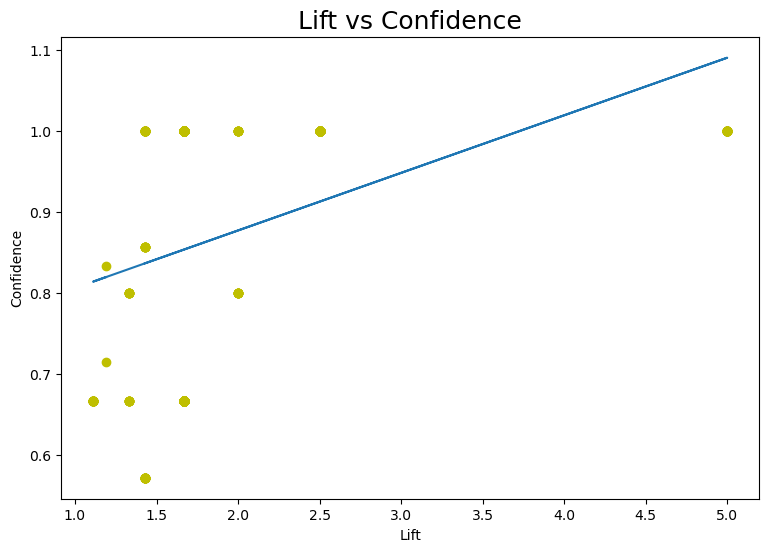

In [14]:
plt.figure(figsize=(9,6))
fit = np.polyfit(result_1['lift'], result_1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(result_1['lift'], result_1['confidence'], 'yo', result_1['lift'], 
fit_fn(result_1['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

### Association rules with 30% Support and 50% confidence

In [15]:
freq_2 = apriori(df,min_support= 0.3, use_colnames= True)
freq_2['length'] = freq_2['itemsets'].apply(lambda x: len(x))
freq_2

C:\Users\Lenovo\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.6,(V1_Gladiator),1
4,0.6,(V2_Patriot),1
...,...,...,...
58,0.4,"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Se...",5
59,0.4,"(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_G...",5
60,0.4,"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Se...",5
61,0.4,"(Patriot, V2_Patriot, V3_Sixth Sense, V1_Gladi...",5


In [16]:
result_2 = association_rules(freq_2,metric= 'confidence', min_threshold= 0.5)
result_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(Patriot, V2_Patriot, V3_Sixth Sense, V1_Gladi...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
598,(V2_Patriot),"(Patriot, Sixth Sense, V3_Sixth Sense, V1_Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000
599,(V3_Sixth Sense),"(Patriot, Sixth Sense, V2_Patriot, V1_Gladiato...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
600,(V1_Gladiator),"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Se...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8,1.000000


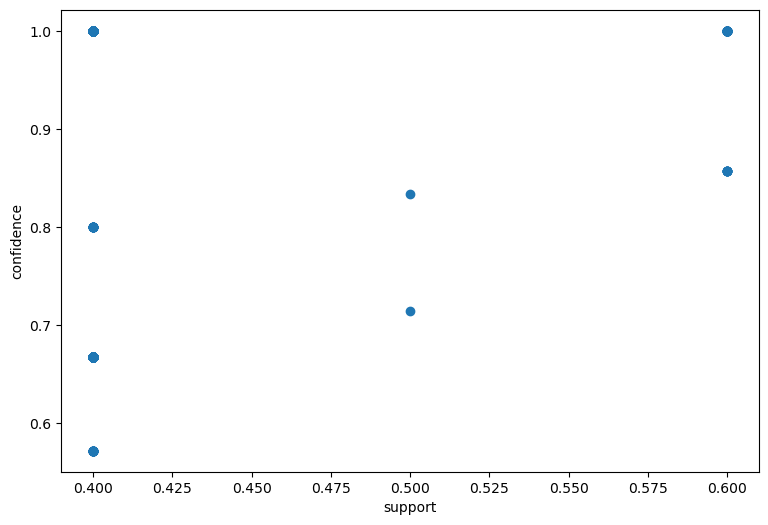

In [17]:
plt.figure(figsize=(9,6))
plt.scatter(result_2['support'],result_2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

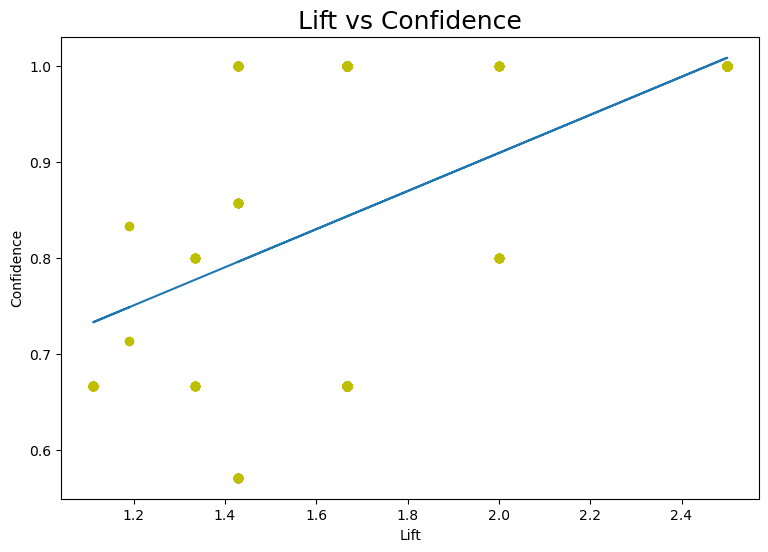

In [18]:
plt.figure(figsize=(9,6))
fit = np.polyfit(result_2['lift'], result_2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(result_2['lift'], result_2['confidence'], 'yo', result_2['lift'], 
fit_fn(result_2['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize = 18)
plt.show()

In [21]:
matrix3 = result_2.pivot('antecedents','consequents','lift')
matrix3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16896\689895897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix3 = result_2.pivot('antecedents','consequents','lift')


consequents,(Gladiator),(Sixth Sense),"(Gladiator, V3_Sixth Sense, V1_Gladiator)","(Gladiator, V2_Patriot, V3_Sixth Sense)","(V2_Patriot, Patriot, V1_Gladiator)",(V3_Sixth Sense),"(V3_Sixth Sense, Patriot, V1_Gladiator)","(V2_Patriot, V3_Sixth Sense, Patriot)","(V2_Patriot, V3_Sixth Sense, V1_Gladiator)","(Sixth Sense, Gladiator, V2_Patriot, V1_Gladiator)",...,"(Sixth Sense, Patriot, V1_Gladiator)","(Sixth Sense, Gladiator, Patriot)","(Gladiator, V2_Patriot, Patriot)","(Sixth Sense, V2_Patriot, Patriot)","(Sixth Sense, Gladiator, V2_Patriot)","(Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_Gladiator, Gladiator)","(Gladiator, V3_Sixth Sense, Patriot)","(Patriot, V1_Gladiator)","(Patriot, Sixth Sense, V3_Sixth Sense, V1_Gladiator, Gladiator)","(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Sense, V1_Gladiator)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,NaN,1.666667,1.666667,1.111111,1.666667,1.666667,1.666667,1.666667,NaN,...,NaN,NaN,1.111111,NaN,NaN,NaN,1.666667,1.111111,NaN,NaN
"(Sixth Sense, V3_Sixth Sense, V1_Gladiator)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, V3_Sixth Sense, V1_Gladiator)",NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, V2_Patriot, V3_Sixth Sense)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN
"(Gladiator, V2_Patriot, V3_Sixth Sense)",NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Sixth Sense, Gladiator, V3_Sixth Sense)",NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN
"(Patriot, Sixth Sense, V2_Patriot, V3_Sixth Sense, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Patriot, Sixth Sense, V3_Sixth Sense, V1_Gladiator, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


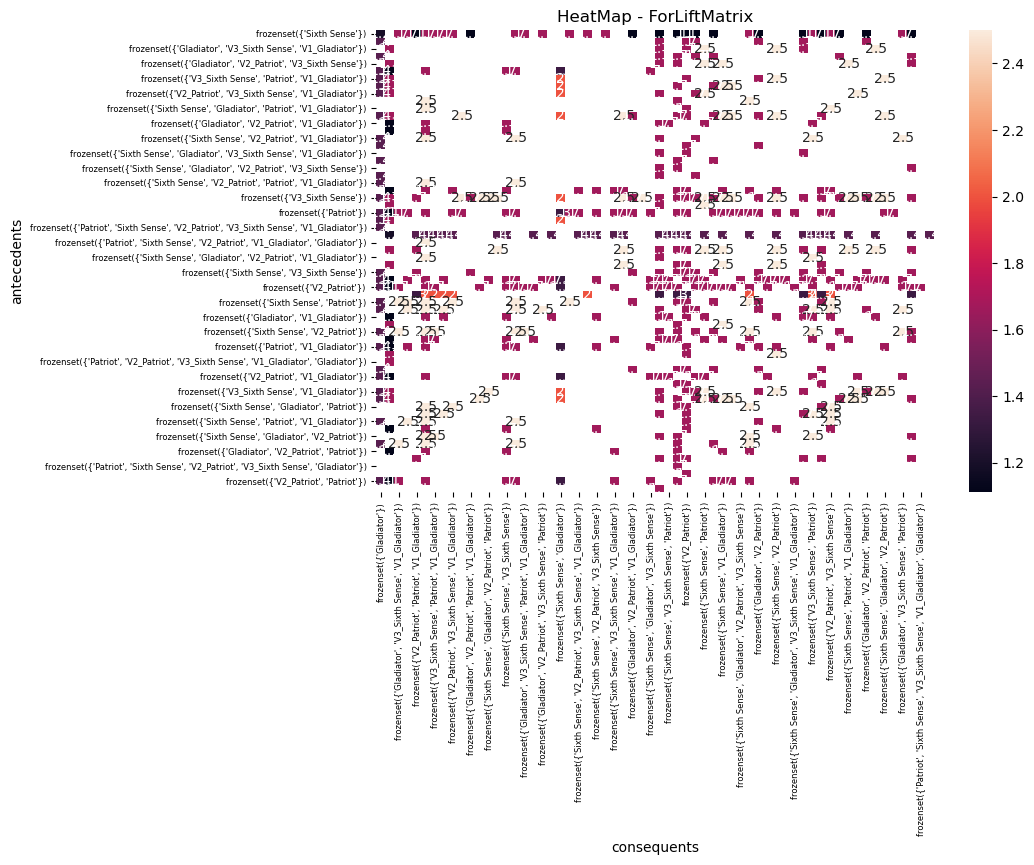

In [22]:
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(matrix3, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()